<a href="https://colab.research.google.com/github/jeanluckei/deep-learning/blob/main/kagglefruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-02 21:56:08          14980  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9065  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4037  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3336  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
!rm -rf '../content/fruits-360_dataset/fruits-360/Test/Physalis'
!rm -rf '../content/fruits-360_dataset/fruits-360/Test/Avocado'
!rm -rf '../content/fruits-360_dataset/fruits-360/Test/Avocado ripe'
!rm -rf '../content/fruits-360_dataset/fruits-360/Training/Avocado'
!rm -rf '../content/fruits-360_dataset/fruits-360/Training/Avocado ripe'
!rm -rf '../content/fruits-360_dataset/fruits-360/Training/Physalis'
!rm -rf '../content/fruits-360_dataset/fruits-360/Test/limpar'
!rm -rf '../content/fruits-360_dataset/fruits-360/Training/limpar'


In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

find: ‘./drive’: Transport endpoint is not connected


In [ ]:
from sklearn.datasets import load_files
import numpy as np

In [ ]:
train_dir = '../content/fruits-360_dataset/fruits-360/Training'
test_dir = '../content/fruits-360_dataset/fruits-360/Test'

#train_dir = '../content/gdrive/MyDrive/fruits-360_dataset/fruits-360/Training'
#test_dir = '../content/gdrive/MyDrive/fruits-360_dataset/fruits-360/Test'

In [ ]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    print(target_labels)
    return files,targets,target_labels

In [ ]:
x_train, y_train, target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

['.ipynb_checkpoints' 'Apple Braeburn' 'Apple Crimson Snow'
 'Apple Golden 1' 'Apple Golden 2' 'Apple Golden 3' 'Apple Granny Smith'
 'Apple Pink Lady' 'Apple Red 1' 'Apple Red 2' 'Apple Red 3'
 'Apple Red Delicious' 'Apple Red Yellow 1' 'Apple Red Yellow 2']
['.ipynb_checkpoints' 'Apple Braeburn' 'Apple Crimson Snow'
 'Apple Golden 1' 'Apple Golden 2' 'Apple Golden 3' 'Apple Granny Smith'
 'Apple Pink Lady' 'Apple Red 1' 'Apple Red 2' 'Apple Red 3'
 'Apple Red Delicious' 'Apple Red Yellow 1' 'Apple Red Yellow 2']
Loading complete!


In [ ]:
x_train.shape

(6404,)

In [ ]:
target_labels

array(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1',
       'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith',
       'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3',
       'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2'],
      dtype='<U19')

In [ ]:
target_labels = np.delete(target_labels, 0)

In [ ]:
y_test.shape

(2134,)

In [ ]:
print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Training set size :  6404
Testing set size :  2134


In [ ]:
# Let's confirm the number of classes :p
no_of_classes = len(np.unique(y_train))
no_of_classes

13

In [ ]:
print(y_train[0:14])

[ 4 13 11  8  3 13 13 12 11  7  5  3 10 12]


In [ ]:
ls fruits-360_dataset/fruits-360/Test/

ls: cannot access 'fruits-360_dataset/fruits-360/Test/': No such file or directory


In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] # Note that only one element has value 1(corresponding to its label) and others are 0.


IndexError: ignored

In [ ]:
x_test.shape

(2134,)

In [ ]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[1000:],x_test[:1000]
y_test,y_vaild = y_test[1000:],y_test[:1000]
from sklearn.model_selection import train_test_split
#x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.30, random_state=42)

print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)


Vaildation X :  (1000,)
Vaildation y : (1000, 13)
Test X :  (1134,)
Test y :  (1134, 13)


In [ ]:
x_train[0]

'../content/fruits-360_dataset/fruits-360/Training/Apple Golden 2/189_100.jpg'

In [ ]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (6404, 100, 100, 3)
Validation set shape :  (1000, 100, 100, 3)
Test set shape :  (1134, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [ ]:
# time to re-scale so that all the pixel values lie within 0 to 1
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[0.9882353 , 1.        , 1.        ],
        [0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.9882353 , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

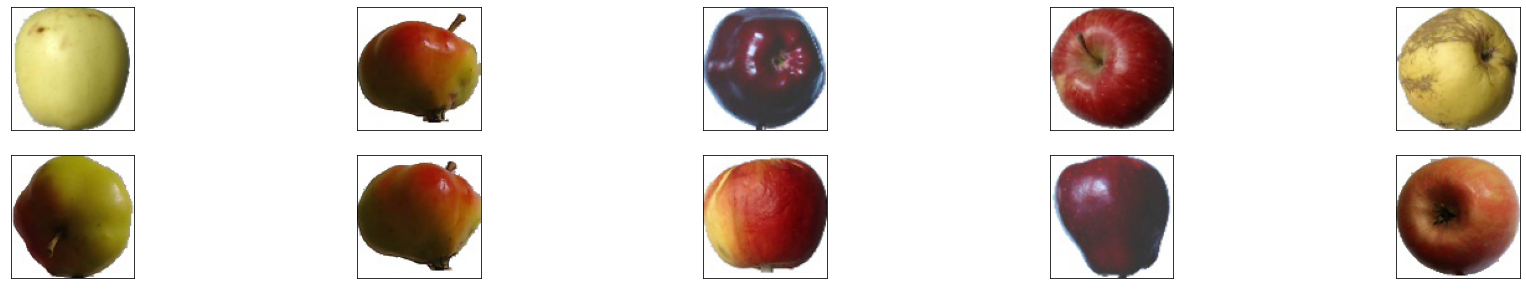

In [ ]:
#Let's visualize the first 10 training images!
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
# Yummy fruits ;) 

In [ ]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(13,activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 16)      208       
_________________________________________________________________
activation_6 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [ ]:
x_valid.shape

(1000, 100, 100, 3)

In [ ]:
batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=6,
        validation_data=(x_valid, y_vaild),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/10
201/201 - 50s - loss: 0.7615 - accuracy: 0.7322 - val_loss: 0.1006 - val_accuracy: 0.9790

Epoch 00001: val_loss improved from inf to 0.10058, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/10
201/201 - 49s - loss: 0.1713 - accuracy: 0.9432 - val_loss: 0.5458 - val_accuracy: 0.8190

Epoch 00002: val_loss did not improve from 0.10058
Epoch 3/10
201/201 - 49s - loss: 0.0813 - accuracy: 0.9780 - val_loss: 0.0527 - val_accuracy: 0.9780

Epoch 00003: val_loss improved from 0.10058 to 0.05269, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/10
201/201 - 49s - loss: 0.0588 - accuracy: 0.9847 - val_loss: 0.0526 - val_accuracy: 0.9740

Epoch 00004: val_loss improved from 0.05269 to 0.05263, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/10
201/201 - 49s - loss: 0.0335 - accuracy: 0.9914 - val_loss: 0.0731 - val_accuracy: 0.9720

Epoch 00005: val_loss did not improve from 0.05263
Epoch 6/10
201/201 - 48s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0276 - val_accur

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])
#98% accuracy !!


 Test accuracy: 0.9964726567268372


In [ ]:
score

[]

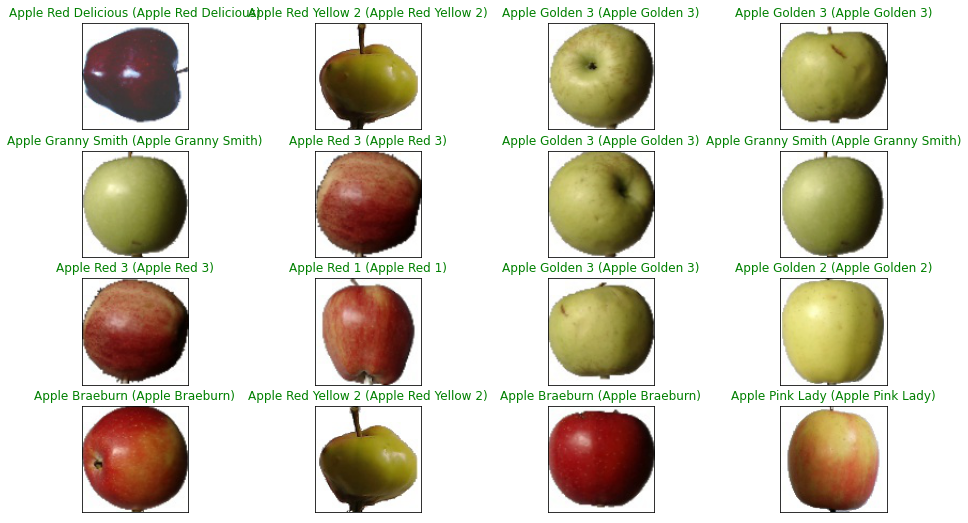

In [ ]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


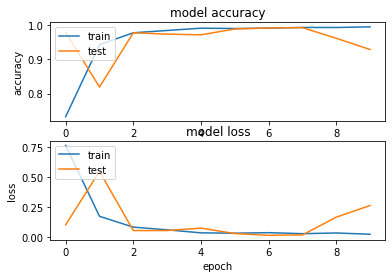

In [ ]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()